<a href="https://colab.research.google.com/github/Mounish2023/fastaicourse/blob/main/DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install fastai --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.2 MB/s eta 0:00:00


In [ ]:
from fastai.data.external import untar_data, URLs

path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [ ]:
(path/'/root/.fastai/data/mnist_sample/train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [ ]:
sevens = (path/'/root/.fastai/data/mnist_sample/train/7').ls().sorted()
threes = (path/'/root/.fastai/data/mnist_sample/train/3').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png'),Path('/root/.fastai/data/mnist_sample/train/3/10093.png'),Path('/root/.fastai/data/mnist_sample/train/3/10097.png'),Path('/root/.fastai/data/mnist_sample/train/3/10099.png'),Path('/root/.fastai/data/mnist_sample/train/3/10116.png'),Path('/root/.fastai/data/mnist_sample/train/3/10125.png'),Path('/root/.fastai/data/mnist_sample/train/3/10137.png'),Path('/root/.fastai/data/mnist_sample/train/3/10141.png'),Path('/ro

In [ ]:
from PIL import Image
imag_path = threes[1]
img = Image.open(imag_path)
img

In [ ]:
import numpy as np

np.array(img)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
from PIL import Image
from torchvision.transforms import ToTensor

# Load image as grayscale
# img = Image.open(imag_path).convert('L')
img = Image.open(imag_path)
# Convert to float tensor (0–1 range)
img_tensor = ToTensor()(img)

# Scale to 0–255 and convert to uint8
img_tensor = (img_tensor * 255).byte()

# Extract the patch
patch = img_tensor[0, 4:10, 4:10]  # [channel, height slice, width slice]
print(patch)


tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)


In [ ]:
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
import pandas as pd
df = pd.DataFrame(img_tensor[0,4:15,4:22])

In [ ]:
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


<Axes: >

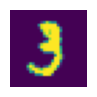

In [ ]:
from fastai.vision.all import show_image
seven_tensors = [((ToTensor()(Image.open(o)))*255).byte() for o in sevens]
three_tensors = [((ToTensor()(Image.open(o)))*255).byte() for o in threes]

show_image(three_tensors[0])

In [ ]:
len(seven_tensors), len(three_tensors)

(6265, 6131)

In [ ]:
import torch

stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

stacked_threes.shape


torch.Size([6131, 1, 28, 28])

In [ ]:
len(stacked_threes.shape)

4

In [ ]:
stacked_threes.ndim

4

<Axes: >

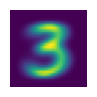

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

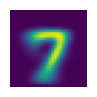

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

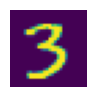

In [ ]:
stacked_threes[1]
show_image(stacked_threes[1])

In [ ]:
dist_3_abs = (stacked_threes[1] - mean3).abs().mean()
dist_3_rmse = ((stacked_threes[1] - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_rmse

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (stacked_threes[1] - mean7).abs().mean()
dist_7_rmse = ((stacked_threes[1] - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_rmse

(tensor(0.1586), tensor(0.3021))

In [ ]:
import torch.nn.functional as F
abs_loss = F.l1_loss(stacked_threes[1], mean3)
rmse_loss = F.mse_loss(stacked_threes[1], mean3).sqrt()
abs_loss, rmse_loss

(tensor(0.1114), tensor(0.2021))

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [ ]:
(path/'/root/.fastai/data/mnist_sample/valid').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/valid/7'),Path('/root/.fastai/data/mnist_sample/valid/3')]

In [ ]:
valid_threes = (path/'/root/.fastai/data/mnist_sample/valid/3').ls().sorted()
valid_sevens = (path/'/root/.fastai/data/mnist_sample/valid/7').ls().sorted()
len(valid_threes), len(valid_sevens)

(1010, 1028)

In [ ]:
valid_threes[1]

Path('/root/.fastai/data/mnist_sample/valid/3/1028.png')

In [ ]:
Image.open(valid_threes[1])

In [ ]:
valid_3_tensors = [(ToTensor()(Image.open(o))) for o in valid_threes]
valid_7_tensors = [ (ToTensor()(Image.open(o))) for o in valid_sevens]


In [ ]:
stacked_3_valid = torch.stack(valid_3_tensors)
stacked_7_valid = torch.stack(valid_7_tensors)

In [ ]:
stacked_3_valid.shape, stacked_7_valid.shape

(torch.Size([1010, 1, 28, 28]), torch.Size([1028, 1, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [ ]:
stacked_3_valid.shape, mean3.shape

(torch.Size([1010, 1, 28, 28]), torch.Size([1, 28, 28]))

In [ ]:
dist = mnist_distance(stacked_3_valid,mean3)

In [ ]:
dist[1]

tensor([0.1623])

In [ ]:
def is_3(x,  mean3): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [ ]:
accuracy3 = is_3(stacked_3_valid, mean3).float().mean()

In [ ]:
accuracy3

tensor(0.9168)

In [ ]:
def is_7(x,mean7): return mnist_distance(x,mean3) > mnist_distance(x,mean7)

In [ ]:
accuracy7_ = is_7(stacked_7_valid,mean7).float().mean()
accuracy7_

tensor(0.9854)

In [ ]:
accuracy7 = (1- is_3(stacked_7_valid,mean3).float()).mean()

In [ ]:
accuracy7

tensor(0.9854)

what have i done so far?
1. Downloaded the data,
2. train and valid data,
3. converted images to tensors,
4. stacked all the images into a single tensor

Pixel Similarity approach:
1. computed mean,
2. used mean abs error, root mean squared error

But no training has happened here. there is no learning. there are no weight parameters initialized and updated based on learning

The Gradient Descent Process
1. init
2. predict
3. loss
4. gradient
5. step
6. repeat
7. stop

In [ ]:
stacked_threes.shape

torch.Size([6131, 1, 28, 28])

In [ ]:
stacked_sevens.shape

torch.Size([6265, 1, 28, 28])

In [ ]:
stacked_threes[1]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
train_x= torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)

In [ ]:
train_x.shape

torch.Size([12396, 784])

In [ ]:
from torch import tensor

train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)


In [ ]:
train_y.shape

torch.Size([12396, 1])

In [ ]:
dtset =list(zip(train_x,train_y))

In [ ]:
dtset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
valid_threes_stacked = torch.stack(valid_3_tensors)
valid_sevens_stacked = torch.stack(valid_7_tensors)

In [ ]:
valid_x = torch.cat([valid_threes_stacked,valid_sevens_stacked]).view(-1,28*28)

In [ ]:
valid_x.shape

torch.Size([2038, 784])

In [ ]:
valid_y = tensor([1]*len(valid_3_tensors) + [0]*len(valid_7_tensors)).unsqueeze(1)

In [ ]:
valid_y.shape

torch.Size([2038, 1])

In [ ]:
valid_dtset = list(zip(valid_x,valid_y))

In [ ]:
valid_dtset[1]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
def init_parameters(size, std=1.0): return (torch.randn(size) * std).requires_grad_()

In [ ]:
weights = init_parameters((28*28,1))

In [ ]:
weights.shape

torch.Size([784, 1])

In [ ]:
bias = init_parameters(1)

In [ ]:
bias

tensor([-0.0928], requires_grad=True)

In [ ]:
(train_x[0] *weights.T).sum() + bias

tensor([12.2680], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb): return xb@weights + bias

In [ ]:
preds = linear1(train_x)

In [ ]:
((preds>0.0).float()==train_y).float().mean().item()

0.6258470416069031

In [ ]:
def mnist_loss(preds, targets): return torch.where(targets==1, 1-preds, preds)

In [ ]:
import torch
import matplotlib.pyplot as plt

def plot_function(f, title='', min=-5, max=5, step=0.1):
    x = torch.arange(min, max, step)
    y = f(x)
    plt.plot(x.numpy(), y.numpy())
    plt.title(title)
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()


In [ ]:
coll = range(15)
from fastai.data.load import DataLoader
dl = DataLoader(coll, batch_size=5, shuffle=True)


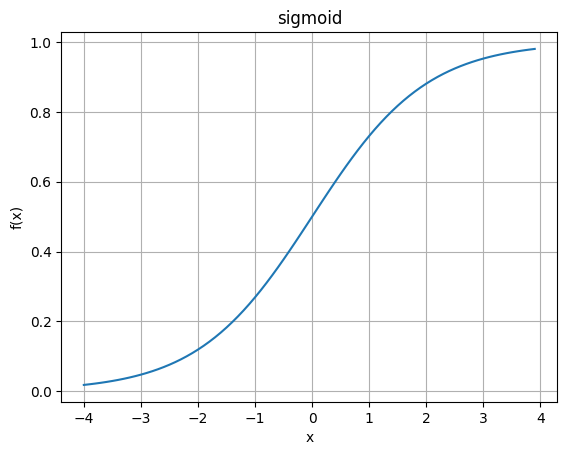

In [ ]:
plot_function(torch.sigmoid, title = 'sigmoid', min=-4, max=4)

# full MNIST dataset

In [2]:
from fastai.data.external import untar_data, URLs

path = untar_data(URLs.MNIST)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [4]:
(path/'/root/.fastai/data/mnist_png/training').ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/4')]

In [5]:
zeros = (path/'/root/.fastai/data/mnist_png/training/0').ls()
ones = (path/'/root/.fastai/data/mnist_png/training/1').ls()
twos = (path/'/root/.fastai/data/mnist_png/training/2').ls()
threes = (path/'/root/.fastai/data/mnist_png/training/3').ls()
fours = (path/'/root/.fastai/data/mnist_png/training/4').ls()
fives = (path/'/root/.fastai/data/mnist_png/training/5').ls()
sixes = (path/'/root/.fastai/data/mnist_png/training/6').ls()
sevens = (path/'/root/.fastai/data/mnist_png/training/7').ls()
eights = (path/'/root/.fastai/data/mnist_png/training/8').ls()
nines = (path/'/root/.fastai/data/mnist_png/training/9').ls()

In [6]:
from PIL import Image
Image.open(zeros[0])

In [7]:
from torchvision.transforms import ToTensor
zeros_tensors = [ToTensor()(Image.open(o)) for o in zeros]
ones_tensors = [ToTensor()(Image.open(o)) for o in ones]
twos_tensors = [ToTensor()(Image.open(o)) for o in twos]
threes_tensors = [ToTensor()(Image.open(o)) for o in threes]
fours_tensors = [ToTensor()(Image.open(o)) for o in fours]
fives_tensors = [ToTensor()(Image.open(o)) for o in fives]
sixes_tensors = [ToTensor()(Image.open(o)) for o in sixes]
sevens_tensors = [ToTensor()(Image.open(o)) for o in sevens]
eights_tensors = [ToTensor()(Image.open(o)) for o in eights]
nines_tensors = [ToTensor()(Image.open(o)) for o in nines]

In [8]:
import torch
zeros_stack = torch.stack(zeros_tensors)
ones_stack = torch.stack(ones_tensors)
twos_stack = torch.stack(twos_tensors)
threes_stack = torch.stack(threes_tensors)
fours_stack = torch.stack(fours_tensors)
fives_stack = torch.stack(fives_tensors)
sixes_stack = torch.stack(sixes_tensors)
sevens_stack = torch.stack(sevens_tensors)
eights_stack = torch.stack(eights_tensors)
nines_stack = torch.stack(nines_tensors)

In [9]:
all_digits_stacked = [zeros_stack,ones_stack,twos_stack,threes_stack,fours_stack,fives_stack,sixes_stack,sevens_stack,eights_stack,nines_stack]

In [10]:
from torch import tensor
train_x = torch.cat(all_digits_stacked).view(-1,28*28)
train_y = tensor([0]*len(zeros_tensors) + [1]*len(ones_tensors) + [2]*len(twos_tensors) + [3]*len(threes_tensors) + [4] *len(fours_tensors) + [5]*len(fives_tensors) + [6]*len(sixes_tensors)+ [7]*len(sevens_tensors) + [8]*len(eights_tensors) + [9]*len(nines_tensors))

In [11]:
# import torch.nn.functional as F
# train_y_onehot = F.one_hot(train_y.squeeze(), num_classes=10).float()

In [12]:
# train_y_onehot.shape

In [13]:
train_x.shape

torch.Size([60000, 784])

In [14]:
train_y.shape

torch.Size([60000])

In [15]:
train_x[0].shape

torch.Size([784])

we have training_data (train_x, train_y)
we need testing data as well.

1. we should create dataloaders
2. mini-batches
3. SGD
4. epochs

-------------------------
define the model.

gradient descent method:
1. initialize parameters
2. predict
3. calculate loss
4. calculate gradients
5. step (update parameters)
6. repeat
7. stop


# First Iteration

**batch size - 256**

**neurons in hidden layer - 128->10**

**2 layer nn**

**learning rate -0.1**

**validation data - 0.2**

In [16]:
from fastai.vision.all import *

define loss function


In [17]:
import torch.nn as nn

def mnist_loss(preds, targets):
  criterion = nn.CrossEntropyLoss()
  return criterion(preds, targets)

In [18]:
import torch.nn.functional as F

def init_parameters(size,std=1.0):
  return (torch.randn(size)*std).requires_grad_()

w1 = init_parameters((28*28,128))
b1 = init_parameters((128))
w2 = init_parameters((128,10))
b2 = init_parameters(10)



def simple_net_model(xb):
  res = xb @ w1 + b1
  res = F.relu(res)
  res = res @ w2 + b2
  return res



In [19]:
from fastai.data.load import DataLoader
from torch.utils.data import random_split

ds = list(zip(train_x,train_y))
train_len = int(0.8*len(ds))
valid_len = len(ds) - train_len
train_ds, valid_ds = random_split(ds, [train_len,valid_len])


train_dls = DataLoader(
    train_ds,
    bs = 256,
    shuffle=True,
    drop_last=True,

)
valid_dls = DataLoader(
    valid_ds,
    bs=256,
    shuffle=True,
    drop_last=True
)

In [20]:
len(valid_ds)

12000

### Sample batch

In [ ]:
xb,yb = first(dls)

In [ ]:
yb = yb.squeeze(1)

In [ ]:
res = simple_net_model(xb)

In [ ]:
res.shape

torch.Size([512, 10])

In [ ]:
res

tensor([[  31.4630,  -25.2580, -152.4645,  ...,  -23.9729,  -51.7128,
          -41.6734],
        [ -23.7740,   14.2651,  -61.4093,  ...,  -12.0240, -101.0313,
            3.2538],
        [   1.2999,  -30.9505, -114.1091,  ...,   38.5006,  -76.0153,
           -8.6094],
        ...,
        [ -63.3201,    6.5856, -126.2909,  ...,  -72.3750, -120.4562,
           14.7107],
        [  17.7572,  -22.0854,  -72.2498,  ...,  -61.5092,  -78.3192,
           11.7325],
        [   9.0785,    1.6489, -189.4030,  ...,   -1.4991,  -88.1430,
          -57.8350]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(res, yb)
loss

tensor(98.5975, grad_fn=<NllLossBackward0>)

In [ ]:
loss.backward()

In [ ]:
w1.grad.shape, w1.grad.mean(), b1.grad

(torch.Size([784, 128]),
 tensor(0.0190),
 tensor([-0.1052,  0.9909, -0.3247,  0.5931,  0.1592,  0.3908,  0.3065,  0.0762,
          0.6013,  0.0140,  0.0103,  0.1351, -0.6762,  0.6282,  0.0291,  0.7181,
         -0.0173,  0.3388,  0.0793, -0.2547,  0.0096, -0.0615,  0.0224, -0.1828,
          0.9881,  0.0469, -0.0355,  0.3990, -0.6575, -0.0560,  0.7028,  0.0288,
          0.8025,  0.0515,  0.4756, -0.0177, -0.1456,  0.1912,  0.3800,  0.3022,
         -0.0666,  0.0036,  0.0299,  0.1049,  0.5522,  0.4913,  0.2586, -0.1912,
          0.3990,  0.5030, -0.1753,  1.0848, -0.0724,  0.4740, -0.1816,  0.0119,
          0.0411,  0.1543,  0.1535, -0.2382,  0.2960,  0.7033, -0.1072,  0.2896,
         -0.0043, -0.2867,  0.7857,  0.7344,  0.2177, -0.5760, -0.4702,  0.1501,
         -0.2762, -0.0274,  0.4489,  0.2648,  0.2851,  0.4971, -0.8483, -0.0960,
          1.3834,  0.1455,  0.4489, -0.0173, -0.2818, -0.0166,  0.2675, -0.0202,
          0.5433,  0.7706, -0.4364, -0.0394, -0.1442, -0.1154,  0.2

### Full training

In [21]:
def calc_grad(xb,yb,model):
  preds = model(xb)
  loss = mnist_loss(preds,yb)
  loss.backward()


In [22]:
class BasicOptimizer:
  def __init__(self,params,lr) -> None:
    self.params = list(params)
    self.lr = lr
  def step(self,*args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data *self.lr
  def zero_grad(self,*args, **kwargs):
    for p in self.params:
      p.grad = None



params = [w1,b1,w2,b2]
lr=0.1
opt = BasicOptimizer(params,lr)
def train_epoch(model):

  for xb,yb in train_dls:
    calc_grad(xb,yb,model)
    opt.step()
    opt.zero_grad()






In [23]:
def batch_accuracy(logits, yb):
    """
    logits: Tensor of shape [batch_size, 10], raw model outputs
    yb:     Tensor of shape [batch_size], integer labels 0–9
    """
    # 1) predicted class is the index with highest logit
    preds = logits.argmax(dim=1)        # shape [batch_size]

    # 2) compare to ground truth
    correct = (preds == yb)             # boolean tensor [batch_size]

    # 3) convert to float and average
    return correct.float().mean()

def validate_epoch(model):
  accs = [batch_accuracy(model(xb),yb) for xb,yb in valid_dls]
  return round(torch.stack(accs).float().mean().item(),4)


def train_model(epochs, model):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end= ' ')


In [24]:
train_model(40, simple_net_model)

0.8314 0.8587 0.8716 0.8833 0.8832 0.8882 0.8871 0.8953 0.8854 0.8922 0.9032 0.9009 0.8854 0.9041 0.9071 0.9058 0.9068 0.9131 0.9096 0.9111 0.9142 0.9153 0.9092 0.9081 0.917 0.9125 0.9046 0.9169 0.9181 0.919 0.9132 0.92 0.9196 0.9222 0.9197 0.9184 0.9176 0.9243 0.9197 0.9226 

# Second Iteration

1. 3 layer
2. hidden units/neurons -> 256->128->10
3. batch size - 256
4. learning rate - 0.1


In [25]:
simple_net = nn.Sequential(
    nn.Linear(28*28,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,10)
)

In [26]:
dls_full = DataLoaders(train_dls, valid_dls)

In [27]:
learn = Learner(dls_full, simple_net, opt_func=SGD, loss_func=mnist_loss,metrics=batch_accuracy)
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.671517,0.464733,0.868207,00:01
1,0.363887,0.337823,0.900815,00:01
2,0.290792,0.281029,0.919497,00:01
3,0.265236,0.251202,0.929093,00:02
4,0.223415,0.221677,0.935632,00:01
5,0.200381,0.200820,0.943274,00:01
6,0.175732,0.182203,0.947181,00:01
7,0.159894,0.173119,0.950493,00:01
8,0.151886,0.158360,0.952615,00:01
9,0.137609,0.145314,0.958815,00:02


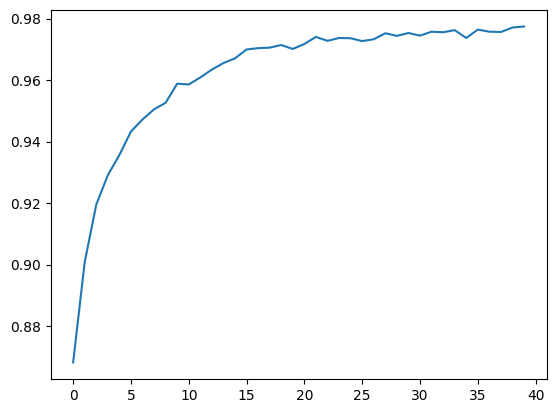

In [28]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [29]:
learn.recorder.values[-1][2]

0.977411687374115

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

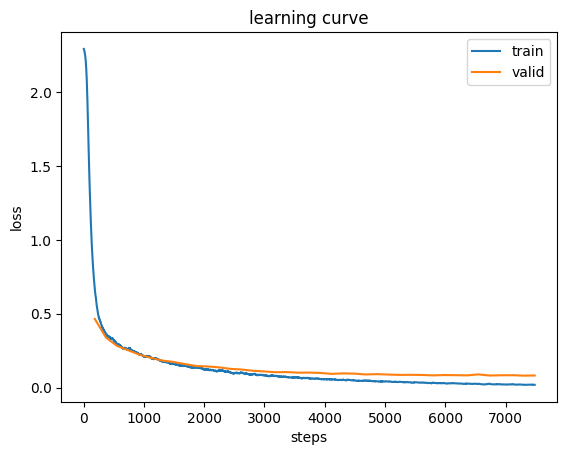

In [30]:
learn.recorder.plot_loss()


In [36]:
type(learn)

fastai.learner.Learner

In [38]:
(path/'/root/.fastai/data/mnist_png/testing').ls()

(#10) [Path('/root/.fastai/data/mnist_png/testing/8'),Path('/root/.fastai/data/mnist_png/testing/6'),Path('/root/.fastai/data/mnist_png/testing/7'),Path('/root/.fastai/data/mnist_png/testing/5'),Path('/root/.fastai/data/mnist_png/testing/2'),Path('/root/.fastai/data/mnist_png/testing/3'),Path('/root/.fastai/data/mnist_png/testing/0'),Path('/root/.fastai/data/mnist_png/testing/9'),Path('/root/.fastai/data/mnist_png/testing/1'),Path('/root/.fastai/data/mnist_png/testing/4')]

In [39]:
from torchvision.transforms import ToTensor
zeros_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/0').ls()])
ones_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/1').ls()])
twos_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/2').ls()])
threes_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/3').ls()])
fours_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/4').ls()])
fives_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/5').ls()])
sixes_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/6').ls()])
sevens_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/7').ls()])
eights_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/8').ls()])
nines_tensors_test = torch.stack([ToTensor()(Image.open(o)) for o in (path/'/root/.fastai/data/mnist_png/testing/9').ls()])

In [51]:
test_x = torch.cat([zeros_tensors_test,ones_tensors_test,twos_tensors_test,threes_tensors_test,fours_tensors_test,fives_tensors_test,sixes_tensors_test,sevens_tensors_test,eights_tensors_test,nines_tensors_test]).view(-1,28*28)
test_y = tensor([0]*len(zeros_tensors_test) + [1]*len(ones_tensors_test) + [2]*len(twos_tensors_test) + [3]*len(threes_tensors_test) + [4] *len(fours_tensors_test) + [5]*len(fives_tensors_test) + [6]*len(sixes_tensors_test)+ [7]*len(sevens_tensors_test) + [8]*len(eights_tensors_test) + [9]*len(nines_tensors_test))

In [52]:
from torch.utils.data import TensorDataset, DataLoader

test_ds = TensorDataset(test_x,test_y)
test_dl = DataLoader(test_ds, batch_size=256, shuffle=False)

test_loss, test_acc = learn.validate(dl=test_dl)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

Test loss: 0.0701, Test accuracy: 0.9779


In [54]:
import torch

model = learn.model.eval()
with torch.no_grad():
    logits = model(test_x)           # [N_test, 10]
    preds  = logits.argmax(dim=1)    # [N_test]
print(preds)  # a LongTensor of your predicted digits


tensor([0, 0, 0,  ..., 9, 9, 9])
